In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("../Datasets/spaceship/train.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
df1=df.drop(["Name","Cabin","PassengerId"],axis=1)

In [12]:
df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## EDA

In [13]:
df1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [31]:
df2=df1.fillna(method="ffill")

In [32]:
df2.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [33]:
df2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [34]:
df2.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [35]:
df2.Transported=df2.Transported.map({True:1,False:0})
df2.VIP=df2.VIP.map({True:1,False:0})
df2.CryoSleep=df2.CryoSleep.map({True:1,False:0})
df3=pd.get_dummies(df2,drop_first=True)

In [36]:
df3.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1


## Building the model

In [37]:
X,y=df3.drop("Transported",axis=1),df3.Transported

In [51]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [64]:
X

array([[-0.74654345,  0.70270593, -0.15501967, ..., -0.51029704,
        -0.32185826,  0.66329   ],
       [-0.74654345, -0.33215103, -0.15501967, ..., -0.51029704,
        -0.32185826,  0.66329   ],
       [-0.74654345,  2.01352475,  6.45079414, ..., -0.51029704,
        -0.32185826,  0.66329   ],
       ...,
       [-0.74654345, -0.1941701 , -0.15501967, ..., -0.51029704,
        -0.32185826,  0.66329   ],
       [-0.74654345,  0.21977268, -0.15501967, ..., -0.51029704,
        -0.32185826, -1.50763619],
       [-0.74654345,  1.04765825, -0.15501967, ..., -0.51029704,
        -0.32185826,  0.66329   ]])

In [40]:
y.value_counts()## it's a balanced dataset

1    4378
0    4315
Name: Transported, dtype: int64

## KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [42]:
k_range=range(3,51)
training_scores=[]
testing_scores=[]
for k in k_range:
    model =KNeighborsClassifier(k)
    model.fit(X_train,y_train)
    training_scores.append(model.score(X_train,y_train))
    testing_scores.append(model.score(X_test,y_test))    

In [43]:
import matplotlib.pyplot as plt

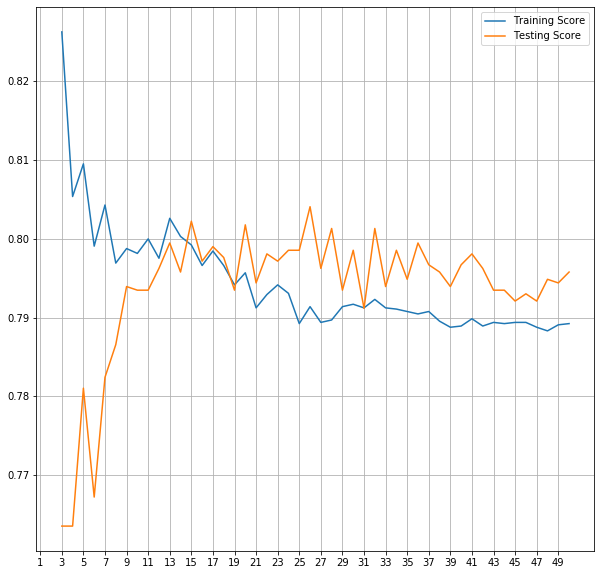

In [44]:
plt.figure(figsize=(10,10))
plt.plot(k_range,training_scores,label="Training Score")
plt.plot(k_range,testing_scores,label="Testing Score")
plt.legend()
plt.grid(9)
plt.xticks(range(1,51,2));

In [45]:
knn_model=KNeighborsClassifier(31)

In [46]:
knn_model.fit(X_train,y_train)
knn_model.score(X_test,y_test)

0.7911683532658693

In [47]:
knn_model.score(X_train,y_train)

0.7912256481055376

In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler =StandardScaler()
X=scaler.fit_transform(X)

## Perceptron

In [65]:
from sklearn.linear_model import Perceptron

In [66]:
perc_model=Perceptron()

In [67]:
perc_model.fit(X_train,y_train)
perc_model.score(X_train,y_train)

0.7781868384721583

In [68]:
perc_model.score(X_test,y_test)

0.781508739650414

## using perceptron with Gridsearch CV

In [96]:
percep_grid=Perceptron()
gridPercepModel=GridSearchCV(percep_grid,param_grid={"class_weight":["balanced",None]},cv=5)

In [97]:
gridPercepModel.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
gridPercepModel.best_score_

0.7379500747728057

In [99]:
gridPercepModel.best_params_

{'class_weight': None}

## using Decision tree with Gridsearch CV

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
Dec_Tree=DecisionTreeClassifier()
gridDec_Tree_Model=GridSearchCV(Dec_Tree,param_grid={"criterion":['gini','entropy'],
                                                     'splitter':['best','random'],
                                                     "class_weight":["balanced",None]},cv=5)

In [103]:
gridDec_Tree_Model.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                

In [105]:
gridDec_Tree_Model.best_score_

0.7374899344300011